# Analysis

In [311]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib_venn import venn2, venn3
import statsmodels.api as sm
import statsmodels.formula.api as smf




"""
import numpy as np
from scipy import stats

from tqdm.notebook import tqdm 
"""

'\nimport numpy as np\nfrom scipy import stats\n\nfrom tqdm.notebook import tqdm \n'

In [6]:
papers_df = pd.read_json('../data/papers_FOCS_ICML_NIPS_STOC_2000_2009.json')
authors_df = pd.read_json('../data/authors_FOCS_ICML_NIPS_STOC_2000_2009.json')

## Community, Conference and Year

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


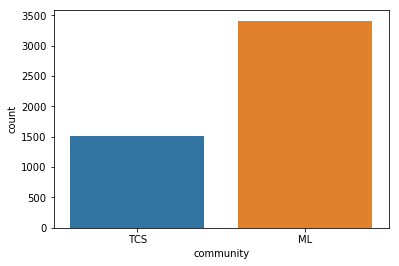

In [7]:
sns.countplot(papers_df['community'])

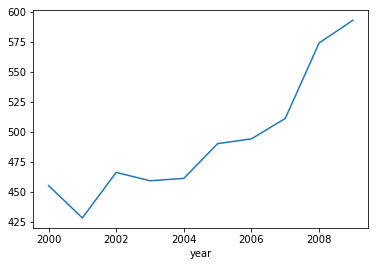

In [11]:
papers_df.groupby('year').size().plot()

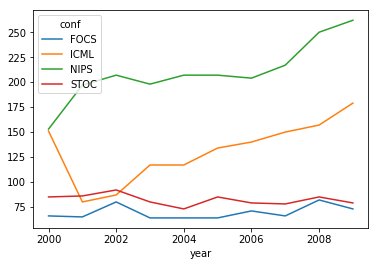

In [12]:
papers_df.groupby(['conf', 'year']).size().unstack().T.plot()

## Number of Authors

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


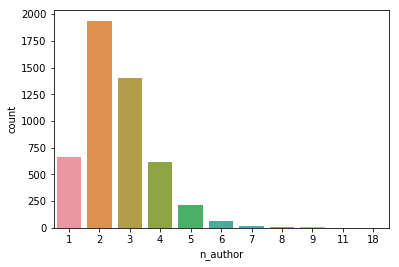

In [13]:
sns.countplot(papers_df['n_author'])

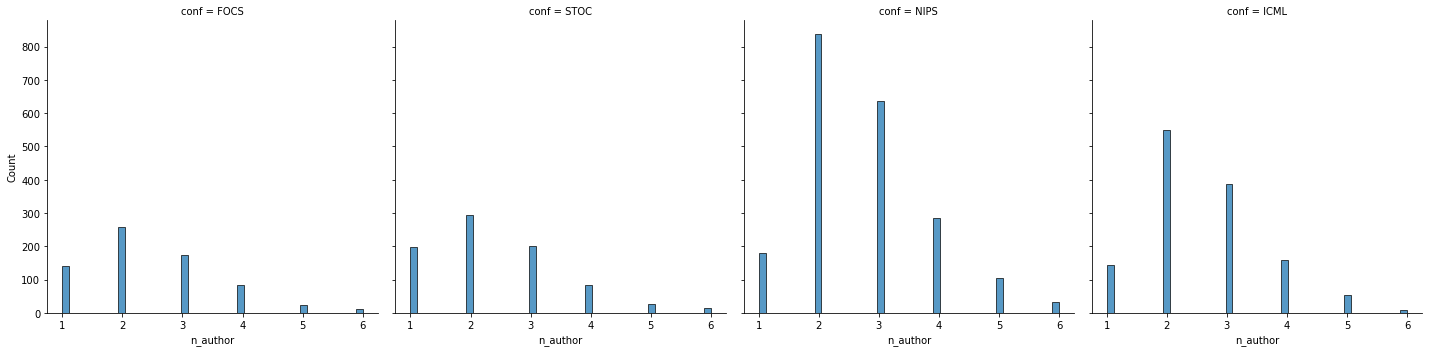

In [19]:
sns.displot(x='n_author', col='conf', kind='hist', data=papers_df[papers_df['n_author'] < 7]);

In [16]:
n_author_per_conf = ((papers_df.groupby('conf')['n_author']
                      .value_counts(normalize=True)
                      .unstack()
                      .T
                      .fillna(0)
                      .round(3) * 100))

In [17]:
n_author_per_conf

conf,FOCS,ICML,NIPS,STOC
n_author,,,,
1,20.4,11.1,8.6,24.0
2,37.0,41.9,39.8,35.6
3,25.2,29.5,30.3,24.5
4,11.9,12.2,13.6,10.3
5,3.5,4.2,5.0,3.3
6,1.6,0.7,1.6,1.7
7,0.1,0.2,0.6,0.2
8,0.3,0.2,0.2,0.4
9,0.0,0.0,0.2,0.0


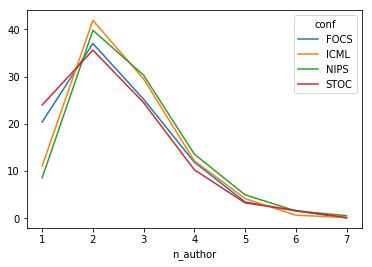

In [18]:
n_author_per_conf[n_author_per_conf.index < 8].plot()

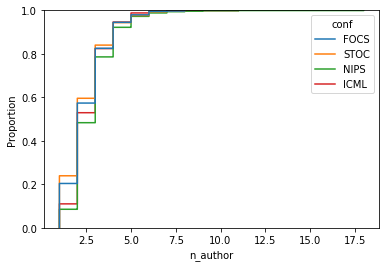

In [20]:
sns.ecdfplot(x='n_author', hue='conf', data=papers_df)

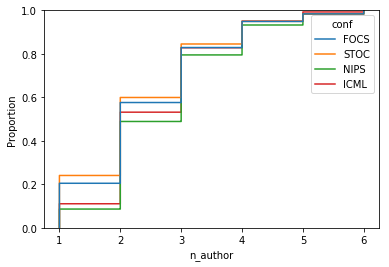

In [22]:
sns.ecdfplot(x='n_author', hue='conf', data=papers_df[papers_df['n_author'] < 7])

In [23]:
from scipy.stats import ks_2samp

ks_2samp(papers_df[papers_df['community'] == 'TCS']['n_author'],
         papers_df[papers_df['community'] == 'ML']['n_author'])

KstestResult(statistic=0.12827111907655436, pvalue=1.6057495710017952e-15)

In [266]:
papers_df.groupby('community')['n_author'].describe()

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
ML,3414.0,2.711482,1.191681,1.0,2.0,2.0,3.0,18.0
TCS,1517.0,2.442320,1.205803,1.0,2.0,2.0,3.0,8.0


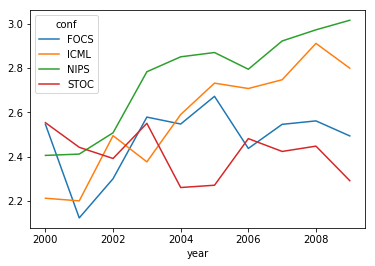

In [24]:
(papers_df
 .groupby(['conf', 'year'])['n_author'].mean()
 .unstack().T.plot())

## Alphabetic Order

In [25]:
papers_df.groupby('community')['is_alphabetical'].mean()

community
ML     0.408026
TCS    0.970995
Name: is_alphabetical, dtype: float64

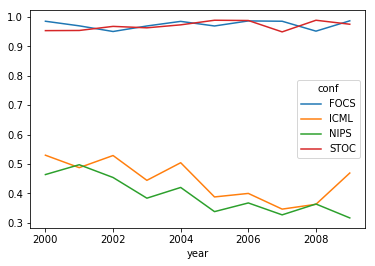

In [26]:
papers_df.groupby(['conf', 'year'])['is_alphabetical'].mean().unstack().T.plot()

## Authors 

In [29]:
len(authors_df)

5422

In [58]:
author_community = authors_df['community'].value_counts()
author_major_community = authors_df['major_community'].value_counts()

### TCS vs. ML communities

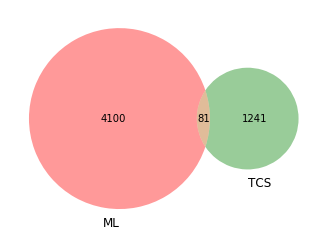

In [38]:
venn2(author_community, author_community.index);

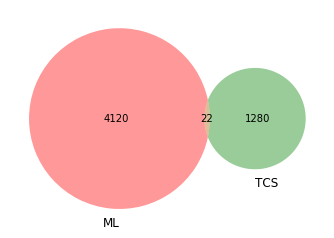

In [39]:
venn2(author_major_community, author_community.index);

In [43]:
conf_sets = authors_df['confs'].apply(set)

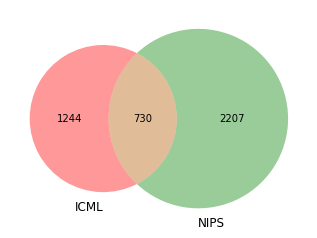

In [52]:
def get_conf_authors(conf):
    return set(authors_df[authors_df['confs'].apply(lambda r: conf in r)].index)

venn2([get_conf_authors('ICML'), get_conf_authors('NIPS')], ['ICML', 'NIPS']);

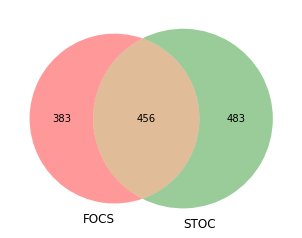

In [54]:
venn2([get_conf_authors('FOCS'), get_conf_authors('STOC')], ['FOCS', 'STOC']);

In [523]:
authors_df.groupby('community')['n_coauthor'].describe()

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,81.0,10.345679,8.330907,1.0,5.0,8.0,12.0,42.0
ML,4100.0,3.951463,4.441024,0.0,2.0,3.0,5.0,81.0
TCS,1241.0,4.459307,4.558950,0.0,2.0,3.0,5.0,32.0


### Adopting alphabetical order

In [84]:
authors_df['community'].value_counts()

ML      4100
TCS     1241
BOTH      81
Name: community, dtype: int64

In [85]:
authors_df['major_community'].value_counts()

ML      4120
TCS     1280
BOTH      22
Name: major_community, dtype: int64

In [91]:
def community_is_alphabetical_by_authors(authors):
    return (papers_df[papers_df['authors']
     .apply(lambda r: any(author in authors for author in r))]
     .groupby('community')['is_alphabetical'])

common_authors = set(authors_df[authors_df['community'] == 'BOTH'].index)

community_is_alphabetical_by_authors(common_authors).mean()

community
ML     0.622754
TCS    0.957447
Name: is_alphabetical, dtype: float64

In [92]:
community_is_alphabetical_by_authors(common_authors).size()

community
ML     167
TCS    282
Name: is_alphabetical, dtype: int64

In [95]:
papers_df.groupby('community')['is_alphabetical'].mean()

community
ML     0.408026
TCS    0.970995
Name: is_alphabetical, dtype: float64

In [98]:
pd.DataFrame({'All': community_is_alphabetical_by_authors(authors_df.index).size(),
              'Major TCS': community_is_alphabetical_by_authors(authors_df[authors_df['major_community'] == 'TCS'].index).size(),
              'Major ML': community_is_alphabetical_by_authors(authors_df[authors_df['major_community'] == 'ML'].index).size(),
             })

,All,Major TCS,Major ML
community,,,
ML,3414,47,3403
TCS,1517,1513,23


It is not straightforward to come up with the right statistical hypothesis testing because the same paper might appear in more than one group. Nevertheless, for ML papers, the 95% CI for all is [0.3915, 04247] and [0.5069, 0.7914] for the major TCS.

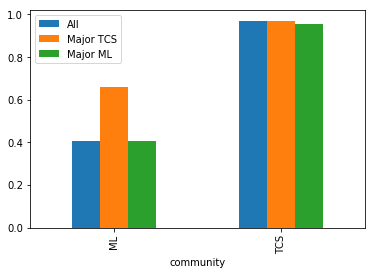

In [94]:
pd.DataFrame({'All': community_is_alphabetical_by_authors(authors_df.index).mean(),
              'Major TCS': community_is_alphabetical_by_authors(authors_df[authors_df['major_community'] == 'TCS'].index).mean(),
              'Major ML': community_is_alphabetical_by_authors(authors_df[authors_df['major_community'] == 'ML'].index).mean(),
             }).plot(kind='bar')

In [308]:
authors_df.groupby('community')['only_sing'].mean() * 100

community
BOTH    0.000000
ML      1.780488
TCS     4.190169
Name: only_sing, dtype: float64

## Independent variables

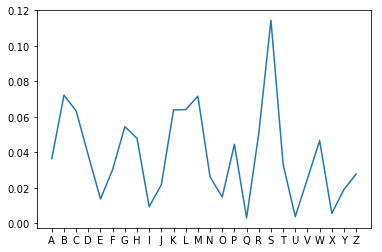

In [129]:
authors_df['letter_int'].value_counts(normalize=True).sort_index().plot()
plt.xticks(range(26), string.ascii_uppercase);

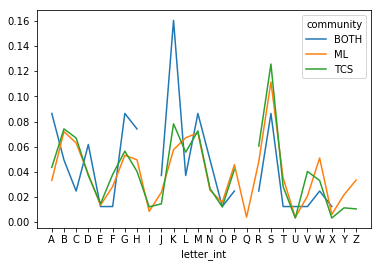

In [240]:
authors_df.groupby('community')['letter_int'].value_counts(normalize=True).unstack().T.plot()
plt.xticks(range(26), string.ascii_uppercase);

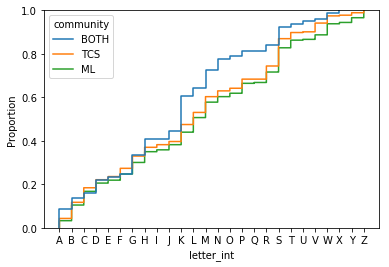

In [246]:
sns.ecdfplot(x='letter_int', hue='community', data=authors_df)
plt.xticks(range(26), string.ascii_uppercase);

In [262]:
ks_2samp(authors_df[authors_df['community'] == 'ML']['letter'],
         authors_df[authors_df['community'] == 'TCS']['letter'])

KstestResult(statistic=0.054177394312218706, pvalue=0.00712493931436875)

In [263]:
authors_df.groupby('community')['first_prop'].describe()

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,81.0,0.371942,0.341346,0.0,0.0,0.346154,0.6,1.0
ML,4027.0,0.385292,0.446078,0.0,0.0,0.000000,1.0,1.0
TCS,1189.0,0.357714,0.438578,0.0,0.0,0.000000,1.0,1.0


In [269]:
authors_df.groupby('community')['real_last_prop'].describe()

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,81.0,0.330818,0.324722,0.0,0.0,0.25,0.500000,1.0
ML,4027.0,0.280011,0.410115,0.0,0.0,0.00,0.537433,1.0
TCS,1189.0,0.333221,0.429915,0.0,0.0,0.00,0.875000,1.0


In [274]:
authors_df[~authors_df['only_sing']].groupby('community')['avg_coauthor'].describe()

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,81.0,1.601995,0.605159,0.500000,1.076923,1.5,2.0,4.0
ML,4027.0,2.265804,1.674092,0.200000,1.000000,2.0,3.0,17.0
TCS,1189.0,2.035157,1.190965,0.285714,1.000000,2.0,2.5,7.0


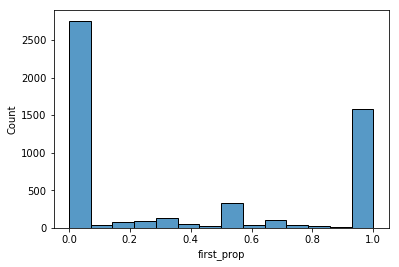

In [161]:
sns.histplot(authors_df['first_prop'])

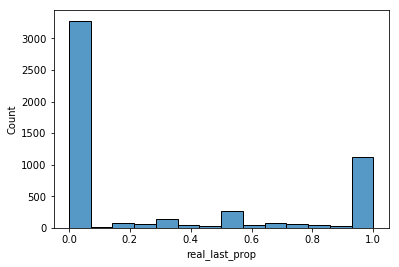

In [165]:
sns.histplot(authors_df['real_last_prop'])

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


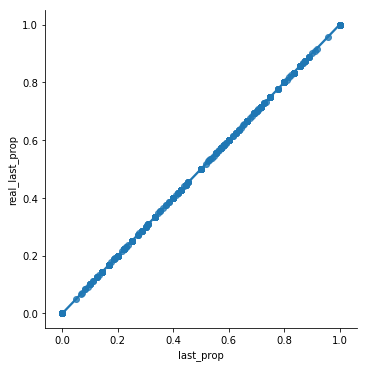

In [169]:
sns.lmplot('last_prop', 'real_last_prop', data=authors_df)

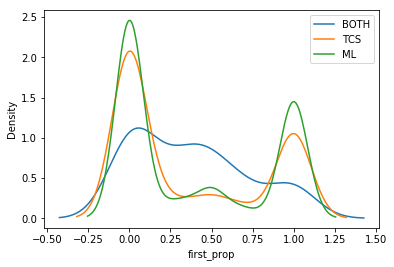

In [182]:
for label in authors_df['community'].unique():
    community_df = authors_df[authors_df['community']==label]
    sns.kdeplot(data=community_df, x='first_prop', label=label)
plt.legend()

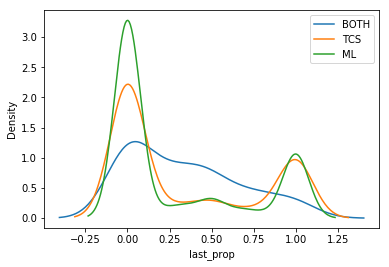

In [184]:
for label in authors_df['community'].unique():
    community_df = authors_df[authors_df['community']==label]
    sns.kdeplot(data=community_df, x='last_prop', label=label)
plt.legend()

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


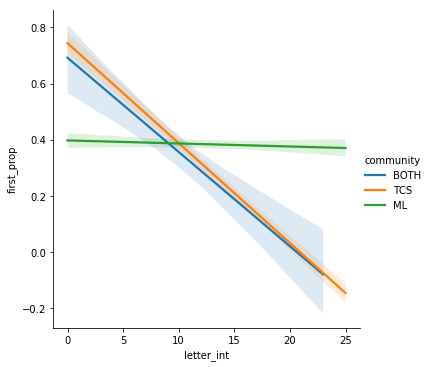

In [256]:
sns.lmplot('letter_int', 'first_prop', hue='community', scatter=False, data=authors_df)

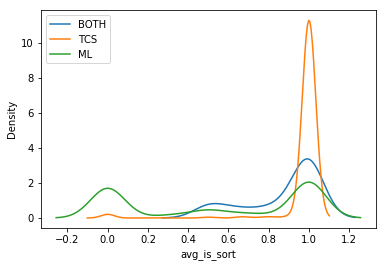

In [257]:
for label in authors_df['community'].unique():
    community_df = authors_df[authors_df['community']==label]
    ax = sns.kdeplot(data=community_df, x='avg_is_sort', label=label)
    # ax.set_xscale('log')
plt.legend()

## Dependent variable

### Missing Data

In [196]:
authors_df['hindex'].isna().mean()

0.32183696053116934

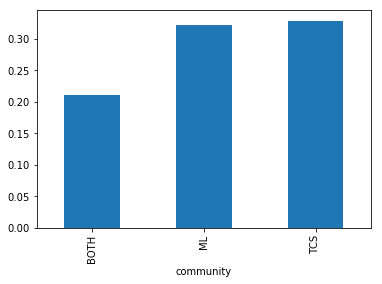

In [231]:
authors_df.groupby('community')['hindex'].apply(lambda g: g.isna().mean()).plot(kind='bar')

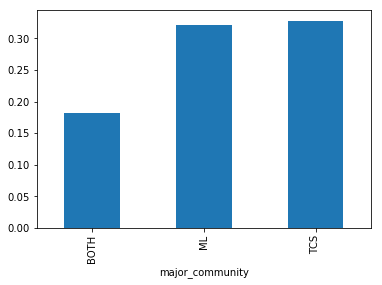

In [199]:
authors_df.groupby('major_community')['hindex'].apply(lambda g: g.isna().mean()).plot(kind='bar')

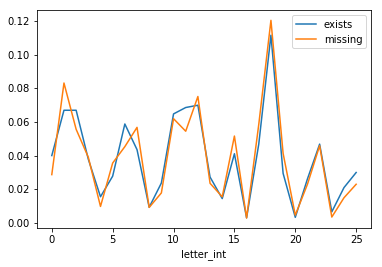

In [485]:
missing_hindex_by_letter = pd.DataFrame(
    {'exists': authors_df.groupby('letter_int')['hindex'].apply(lambda g: (~g.isna()).sum()),
     'missing': authors_df.groupby('letter_int')['hindex'].apply(lambda g: g.isna().sum())})
(missing_hindex_by_letter / missing_hindex_by_letter.sum(axis=0)).plot()

In [486]:
stats.chi2_contingency(missing_hindex_by_letter)[:2]

(50.76613388689697, 0.0017126756959771232)

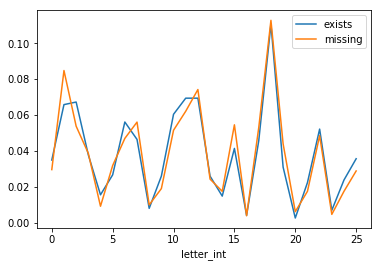

In [487]:
missing_ML_hindex_by_letter = pd.DataFrame(
    {'exists': authors_df[authors_df['community']=='ML'].groupby('letter_int')['hindex'].apply(lambda g: (~g.isna()).sum()),
     'missing': authors_df[authors_df['community']=='ML'].groupby('letter_int')['hindex'].apply(lambda g: g.isna().sum())})
(missing_ML_hindex_by_letter / missing_ML_hindex_by_letter.sum(axis=0)).plot()

In [495]:
stats.chi2_contingency(missing_ML_hindex_by_letter)[:2]

(36.26923579291865, 0.06761279871481096)

In [497]:
ks_2samp(missing_ML_hindex_by_letter['exists'],
         missing_ML_hindex_by_letter['missing'])

KstestResult(statistic=0.46153846153846156, pvalue=0.007134100565905311)

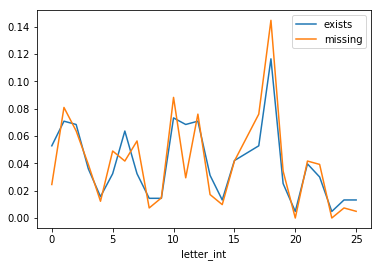

In [491]:
missing_TCS_hindex_by_letter = pd.DataFrame(
    {'exists': authors_df[authors_df['community']=='TCS'].groupby('letter_int')['hindex'].apply(lambda g: (~g.isna()).sum()),
     'missing': authors_df[authors_df['community']=='TCS'].groupby('letter_int')['hindex'].apply(lambda g: g.isna().sum())})
(missing_TCS_hindex_by_letter / missing_TCS_hindex_by_letter.sum(axis=0)).plot()

In [493]:
stats.chi2_contingency(missing_TCS_hindex_by_letter)[:2]

(38.09315421286028, 0.03391847538947859)

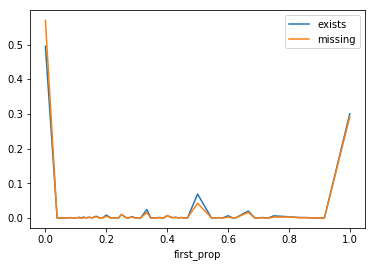

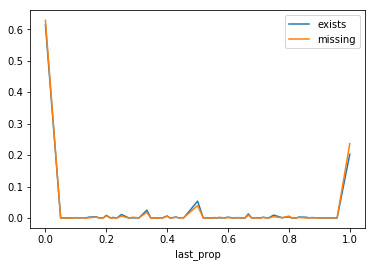

In [227]:
missing_hindex_by_first_prop = pd.DataFrame(
    {'exists': authors_df.groupby('first_prop')['hindex'].apply(lambda g: (~g.isna()).sum()),
     'missing': authors_df.groupby('first_prop')['hindex'].apply(lambda g: g.isna().sum())})
(missing_hindex_by_first_prop / missing_hindex_by_first_prop.sum(axis=0)).plot()

missing_hindex_by_last_prop = pd.DataFrame(
    {'exists': authors_df.groupby('last_prop')['hindex'].apply(lambda g: (~g.isna()).sum()),
     'missing': authors_df.groupby('last_prop')['hindex'].apply(lambda g: g.isna().sum())})
(missing_hindex_by_last_prop / missing_hindex_by_last_prop.sum(axis=0)).plot()

## Dependet

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,64.0,42.640625,21.615961,4.0,28.0,37.5,55.25,104.0
ML,2780.0,38.717266,29.794702,0.0,18.0,31.0,51.00,236.0
TCS,833.0,34.980792,22.574920,0.0,20.0,30.0,45.00,166.0


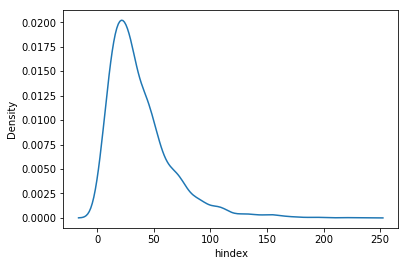

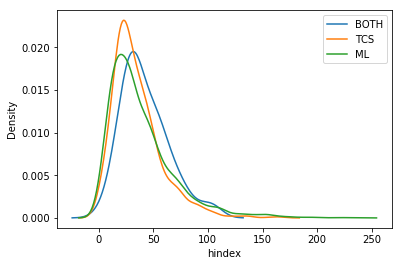

In [370]:
sns.kdeplot(x='hindex', data=authors_df)

_ = plt.figure()
for label in authors_df['community'].unique():
    community_df = authors_df[authors_df['community']==label]
    sns.kdeplot(data=community_df, x='hindex', label=label)
plt.legend()

authors_df.groupby('community')['hindex'].describe()

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,64.0,612.474145,613.233148,6.142857,166.237939,373.112045,874.846316,2394.200000
ML,2780.0,683.716719,1337.596880,0.000000,106.660444,271.060150,688.808756,23265.933333
TCS,833.0,393.076689,700.238134,0.000000,88.789474,178.476190,402.407407,9858.818182


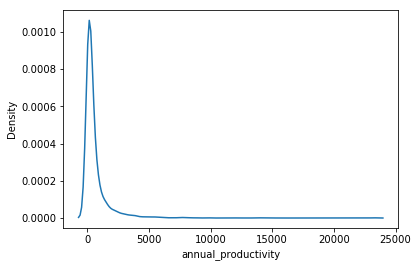

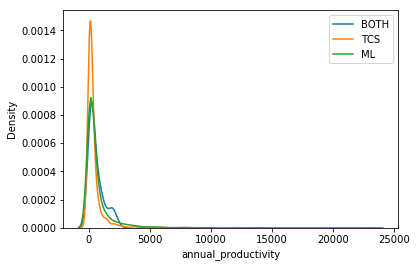

In [371]:
sns.kdeplot(x='annual_productivity', data=authors_df)

_ = plt.figure()
for label in authors_df['community'].unique():
    community_df = authors_df[authors_df['community']==label]
    sns.kdeplot(data=community_df, x='annual_productivity', label=label)
plt.legend()

authors_df.groupby('community')['annual_productivity'].describe()

## Controls

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,64.0,21.656250,6.164977,7.0,18.0,20.0,24.25,41.0
ML,2780.0,20.631295,6.986778,1.0,16.0,20.0,24.00,41.0
TCS,833.0,22.300120,7.424538,1.0,17.0,21.0,27.00,41.0


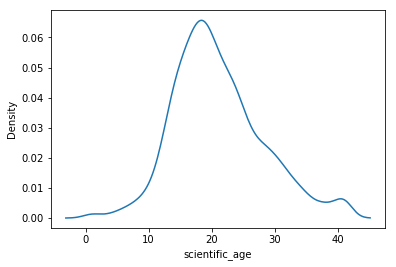

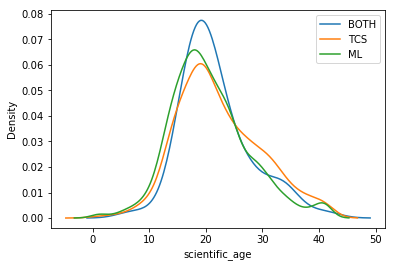

In [281]:
sns.kdeplot(x='scientific_age', data=authors_df)

_ = plt.figure()
for label in authors_df['community'].unique():
    community_df = authors_df[authors_df['community']==label]
    sns.kdeplot(data=community_df, x='scientific_age', label=label)
plt.legend()

authors_df.groupby('community')['scientific_age'].describe()

,count,mean,std,min,25%,50%,75%,max
community,,,,,,,,
BOTH,64.0,14238.125000,16543.784122,43.0,3517.75,7044.5,18096.50,78773.0
ML,2780.0,14794.097482,28534.506930,0.0,2001.50,5557.5,14481.75,361042.0
TCS,833.0,9323.097239,16817.820447,0.0,1671.00,3867.0,9888.00,244389.0


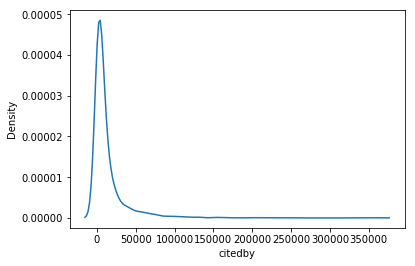

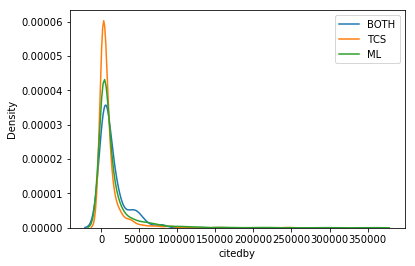

In [282]:
sns.kdeplot(x='citedby', data=authors_df)

_ = plt.figure()
for label in authors_df['community'].unique():
    community_df = authors_df[authors_df['community']==label]
    sns.kdeplot(data=community_df, x='citedby', label=label)
plt.legend()

authors_df.groupby('community')['citedby'].describe()

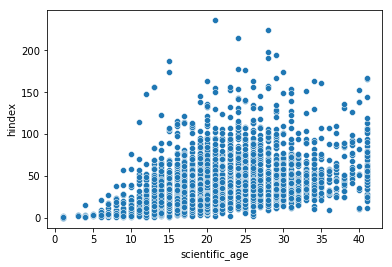

In [367]:
ax = sns.scatterplot(x='scientific_age', y='hindex', data=authors_df)

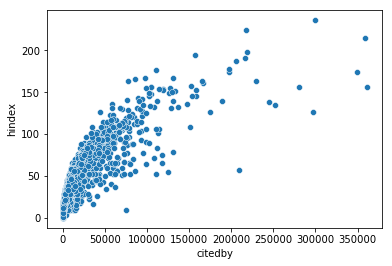

In [365]:
ax = sns.scatterplot(x='citedby', y='hindex', data=authors_df)

## All variable correlation

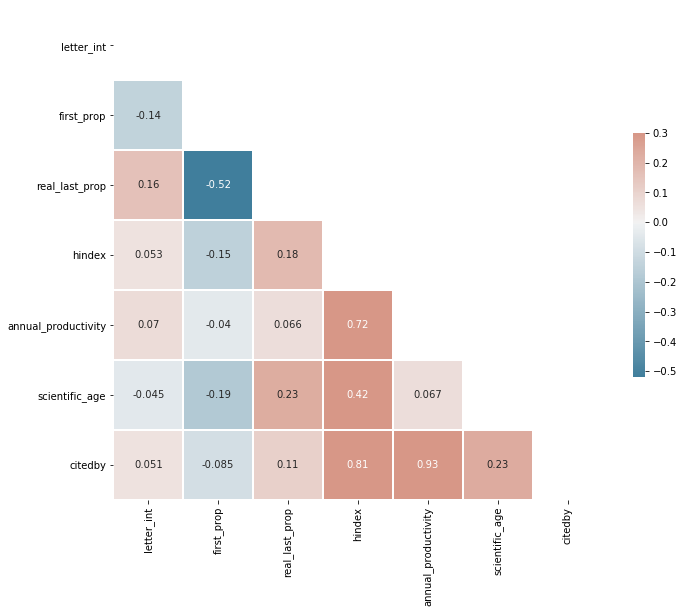

In [363]:
corr = authors_df[['letter_int', 'first_prop', 'real_last_prop', 'hindex', 'annual_productivity', 'scientific_age', 'citedby']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)

In [428]:
q = authors_df[authors_df['community'] == 'ML']

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


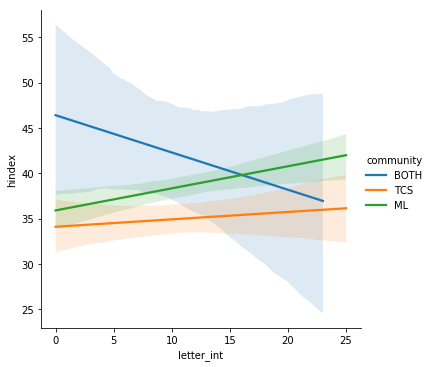

In [501]:
sns.lmplot('letter_int', 'hindex', hue='community', scatter=False, data=authors_df)

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


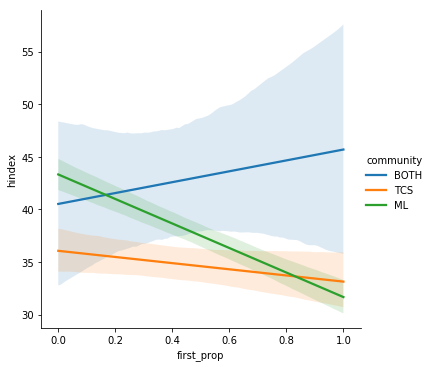

In [503]:
sns.lmplot('first_prop', 'hindex', hue='community', scatter=False, data=authors_df)

## With whom writing papers? - TODO MAYBER LATTER

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


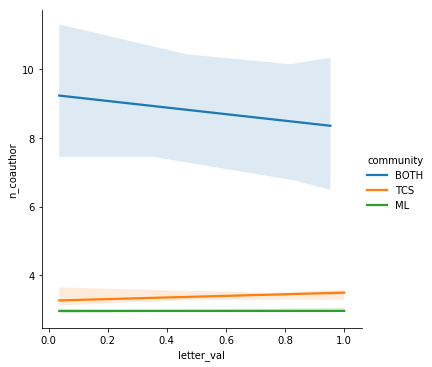

In [521]:
sns.lmplot('letter_val', 'n_coauthor', hue='community',
           robust=True, n_boot=10,
           scatter=False, data=authors_df)

In [528]:
(smf.ols('n_coauthor ~ letter_val * community', data=authors_df[authors_df['community'] == 'TCS'])
 .fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_coauthor   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.194
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.275
Time:                        16:10:13   Log-Likelihood:                -3642.5
No. Observations:                1241   AIC:                             7289.
Df Residuals:                    1239   BIC:                             7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2055      0.266     15.817      0.000       3.684       4.727
letter_val     0.4969      0.455      1.093      0.275      -0.395       1.389
==============================================================================
Omnibus:                      584.313   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2822.029
Skew:                           2.235   Prob(JB):                         0.00
Kurtosis:                       8.882   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [533]:
(smf.rlm('n_coauthor ~ letter_val', data=authors_df[authors_df['community'] == 'TCS'])
 .fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             n_coauthor   No. Observations:                 1241
Model:                            RLM   Df Residuals:                     1239
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 07 Dec 2020                                         
Time:                        16:12:57                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2566      0.156     20.924      0.000       2.952       3.562
letter_val     0.2347      0.266      0.882      0.378      -0.287       0.756
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Regression Models

In [498]:
results = []

for independed_variable in ['letter_int', 'first_prop', 'real_last_prop']:
    for family in ['ols', 'quantreg']:
        for hindex_threshold in [1, authors_df['hindex'].median()]:
            for community in ['ML', 'TCS']:
                    model = (getattr(smf, family)(formula=f'hindex ~ scientific_age + {independed_variable}',
                                   data=authors_df[(authors_df['community'] == community)
                                                   & (authors_df['hindex'] >= hindex_threshold)
                                                   & (authors_df['scientific_age'] >= 10)])
                             .fit())
                    results.append({'independed_variable': independed_variable,
                                      'family': family,
                                      'hindex_threshold': hindex_threshold,
                                      'community': community,
                                      'id_p': model.pvalues[independed_variable],
                                      'sa_p': model.pvalues['scientific_age'],
                                      'id_t': model.tvalues[independed_variable],
                                      'sa_t': model.tvalues['scientific_age'],
                                      #'adj_r^2': model.rsquared_adj,
                                      'nobs': model.nobs})
                    print(community, hindex_threshold, model.summary())
                                      
pd.DataFrame(results)

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/sit

ML 1                             OLS Regression Results                            
Dep. Variable:                 hindex   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -1.000
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               1.00
Time:                        10:03:26   Log-Likelihood:                 169.39
No. Observations:                   5   AIC:                            -332.8
Df Residuals:                       2   BIC:                            -334.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0000   4.16e-15   

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/quantile_regression.py:277: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - np.sum(e) / np.sum(ered)
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/quantile_regression.py:277: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - np.sum(e) / np.sum(ered)
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715:

TCS 1                          QuantReg Regression Results                          
Dep. Variable:                 hindex   Pseudo R-squared:                 -inf
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Mon, 07 Dec 2020   No. Observations:                    1
Time:                        10:03:26   Df Residuals:                        0
                                        Df Model:                            0
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0050        nan        nan        nan         nan         nan
scientific_age     0.0498        nan        nan        nan         nan         nan
letter_int         0.0498        nan        nan        nan         nan         nan

The smallest eigenvalue i

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/stats

TCS 31.0                             OLS Regression Results                            
Dep. Variable:                 hindex   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.00e-12
Time:                        10:03:27   Log-Likelihood:                -1421.2
No. Observations:                 429   AIC:                             2848.
Df Residuals:                     426   BIC:                             2861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.6734      1.21

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/s

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [469]:
authors_df.iloc[5]

stand_name                                                 WIGDERSON AVI
confs                  [FOCS, FOCS, FOCS, FOCS, FOCS, FOCS, FOCS, FOC...
communities            [TCS, TCS, TCS, TCS, TCS, TCS, TCS, TCS, TCS, ...
community                                                            TCS
community_ratio                                                        0
major_community                                                      TCS
multi                                                              False
real_name                                                  Avi Wigderson
papers_authors         [[Michael Alekhnovich, Eli Ben-Sasson, Alexand...
coauthors              [[Michael Alekhnovich, Eli Ben-Sasson, Alexand...
n_pub                                                                 26
n_coauthor                                                            29
stand_coauthors        [[ALEKHNOVICH MICHAEL, BENSASSON ELI, RAZBOROV...
avg_is_sort                                        

In [458]:
authors_df['scientific_age'].value_counts()

19.0    270
18.0    248
17.0    241
20.0    214
21.0    214
16.0    206
15.0    195
23.0    178
14.0    176
22.0    175
24.0    174
13.0    131
25.0    122
26.0    118
28.0     95
29.0     92
27.0     86
12.0     82
31.0     78
30.0     72
41.0     61
32.0     52
11.0     50
33.0     48
34.0     40
10.0     36
35.0     33
9.0      24
8.0      23
38.0     22
37.0     19
36.0     17
1.0      15
6.0      15
39.0     14
7.0      13
40.0     12
4.0       7
5.0       6
3.0       3
Name: scientific_age, dtype: int64

0.13376334846774687

In [425]:
authors_two_major_communites_df = authors_df[authors_df['major_community'] != 'BOTH']
hindex_threshold = 1#authors_two_major_communites_df['hindex'].median()

print(hindex_median)

print(smf.ols(formula='hindex ~  letter_int * major_community',
         data=authors_two_major_communites_df[authors_two_major_communites_df['hindex'] > hindex_threshold])
 .fit()
 .summary())


31.0
                            OLS Regression Results                            
Dep. Variable:                 hindex   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.724
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           3.85e-05
Time:                        22:30:06   Log-Likelihood:                -17269.
No. Observations:                3632   AIC:                         3.455e+04
Df Residuals:                    3628   BIC:                         3.457e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
I

In [ ]:
print(smf.ols(formula='hindex ~ scientific_age + letter_int',
         data=authors_df[authors_df['community'] == 'TCS'])
 .fit()
 .summary())


print(smf.ols(formula='np.log(hindex) ~ scientific_age + letter_int',
         data=authors_df[(authors_df['community'] == 'TCS') & (authors_df['hindex']>0)])
 .fit()
 .summary())

print(smf.quantreg(formula='hindex ~ scientific_age + letter_int',
         data=authors_df[authors_df['community'] == 'TCS'])
 .fit()
 .summary())


print(smf.quantreg(formula='np.log(hindex) ~ scientific_age + letter_int',
         data=authors_df[(authors_df['community'] == 'TCS') & (authors_df['hindex']>0)])
 .fit()
 .summary())

In [338]:
(smf.ols(formula='hindex ~ first_prop',
         data=authors_df[authors_df['community'] == 'ML'])
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hindex   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     86.05
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           3.42e-20
Time:                        21:18:53   Log-Likelihood:                -13338.
No. Observations:                2780   AIC:                         2.668e+04
Df Residuals:                    2778   BIC:                         2.669e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.3278      0.746     58.062      0.000      41.865      44.791
first_prop   -11.6456      1.255     -9.277      0.000     -14.107      -9.184
==============================================================================
Omnibus:                     1053.692   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4529.013
Skew:                           1.813   Prob(JB):                         0.00
Kurtosis:                       8.095   Cond. No.                         2.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
(smf.ols(formula='hindex ~ last_prop',
         data=authors_df[authors_df['community'] == 'ML'])
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hindex   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     153.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           2.31e-34
Time:                        21:18:26   Log-Likelihood:                -13306.
No. Observations:                2780   AIC:                         2.662e+04
Df Residuals:                    2778   BIC:                         2.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0602      0.666     51.119      0.000      32.754      35.367
last_prop     16.8826      1.362     12.392      0.000      14.211      19.554
==============================================================================
Omnibus:                     1059.645   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4606.761
Skew:                           1.819   Prob(JB):                         0.00
Kurtosis:                       8.151   Cond. No.                         2.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [336]:
(smf.ols(formula='hindex ~ letter_int',
         data=authors_df[authors_df['community'] == 'TCS'])
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hindex   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5347
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.465
Time:                        21:18:40   Log-Likelihood:                -3777.5
No. Observations:                 833   AIC:                             7559.
Df Residuals:                     831   BIC:                             7569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1031      1.433     23.802      0.000      31.291      36.915
letter_int     0.0815      0.111      0.731      0.465      -0.137       0.300
==============================================================================
Omnibus:                      269.389   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.322
Skew:                           1.561   Prob(JB):                    4.20e-192
Kurtosis:                       6.955   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
(smf.ols(formula='hindex ~ first_prop',
         data=authors_df[authors_df['community'] == 'TCS'])
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hindex   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.717
Date:                Sun, 06 Dec 2020   Prob (F-statistic):             0.0997
Time:                        21:19:11   Log-Likelihood:                -3776.4
No. Observations:                 833   AIC:                             7557.
Df Residuals:                     831   BIC:                             7566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0752      1.025     35.184      0.000      34.063      38.088
first_prop    -2.9253      1.775     -1.648      0.100      -6.409       0.558
==============================================================================
Omnibus:                      268.911   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.574
Skew:                           1.557   Prob(JB):                    3.70e-192
Kurtosis:                       6.962   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [340]:
(smf.ols(formula='hindex ~ last_prop',
         data=authors_df[authors_df['community'] == 'TCS'])
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hindex   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7092
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.400
Time:                        21:19:15   Log-Likelihood:                -3777.4
No. Observations:                 833   AIC:                             7559.
Df Residuals:                     831   BIC:                             7568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.4677      0.992     34.762      0.000      32.522      36.414
last_prop      1.5461      1.836      0.842      0.400      -2.058       5.150
==============================================================================
Omnibus:                      269.002   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              879.005
Skew:                           1.559   Prob(JB):                    1.34e-191
Kurtosis:                       6.949   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""